In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
import warnings
warnings.filterwarnings("ignore")

качаем файл  
проводим первичный анализ данных

In [2]:
url = "https://raw.githubusercontent.com/yarmukh/Heart-Failure-Data/refs/heads/main/heart.csv?token=GHSAT0AAAAAADJSUA5XHEICK3OVW4FIDNNO2FGK6LQ"
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [4]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


выводим распределение возраста по полу  
видим, что в рамках данного дата сета мужчин больше, чем женщин в каждой возрастной категории.

<Axes: xlabel='Age', ylabel='Count'>

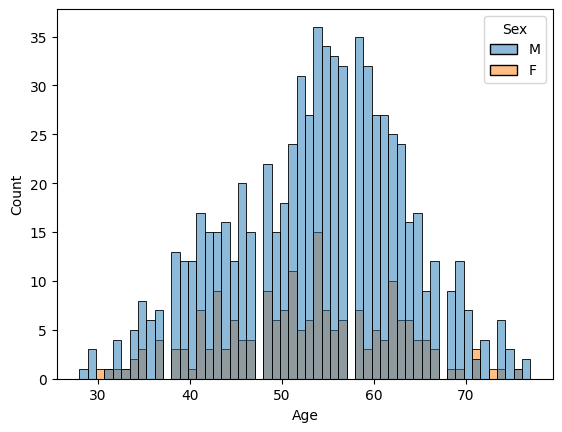

In [6]:
sns.histplot(data = df, x="Age", binwidth=0.9, hue="Sex")

изучим зависимость частоту сердечных заболиваний от возраста  

<Axes: xlabel='Age', ylabel='Count'>

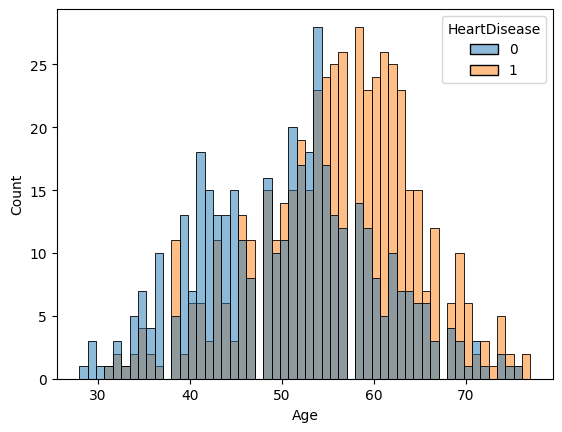

In [7]:
sns.histplot(data = df, x = 'Age', binwidth = 0.9, hue = "HeartDisease")

изучим процент заболевших для различного возраста.  

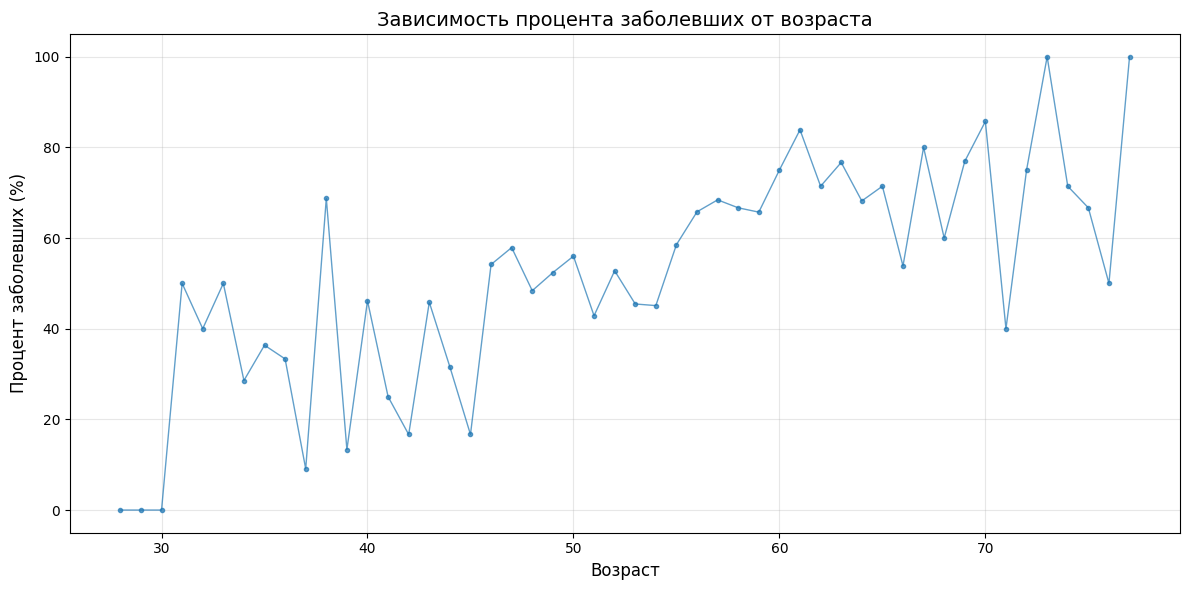

In [8]:
age_stats = df.groupby('Age')['HeartDisease'].agg(['count', 'sum']).reset_index()
age_stats['percentage'] = (age_stats['sum'] / age_stats['count']) * 100

plt.figure(figsize=(12, 6))
plt.plot(age_stats['Age'], age_stats['percentage'],
         marker='o', linestyle='-', linewidth=1, markersize=3, alpha=0.7)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Процент заболевших (%)', fontsize=12)
plt.title('Зависимость процента заболевших от возраста', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

делаем проверку данных на соответствие нормальному распределению  

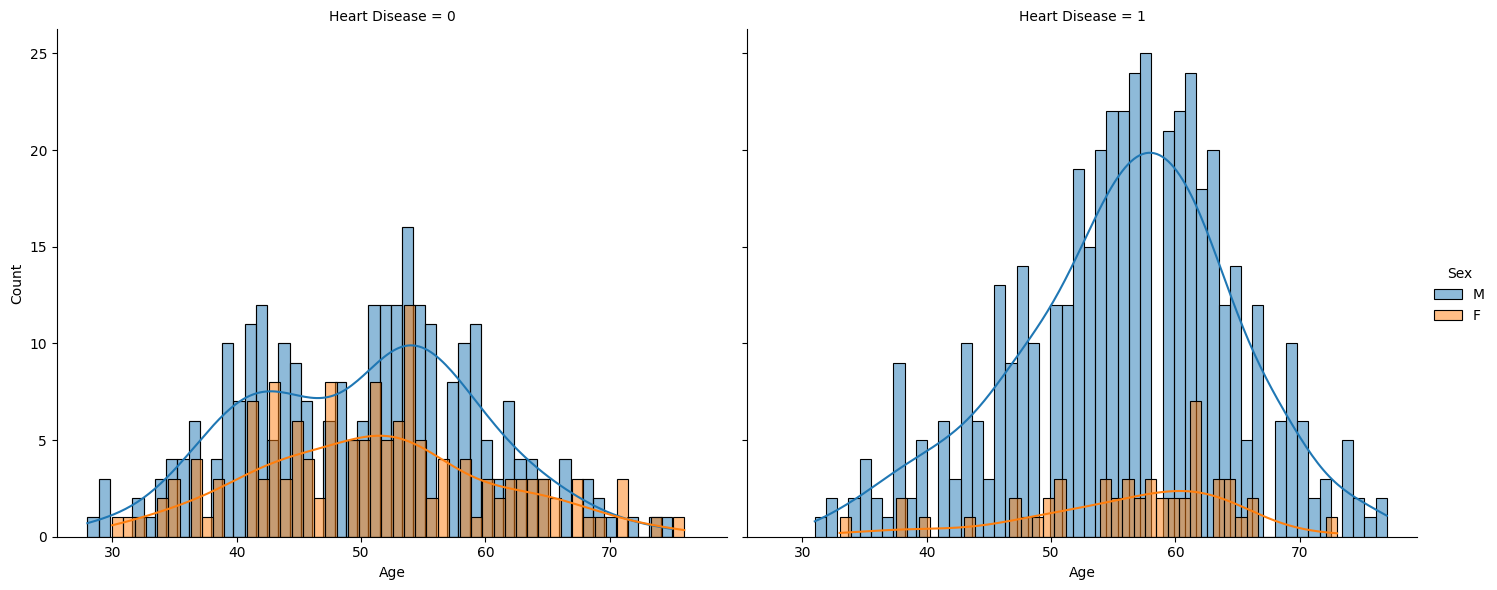

In [9]:
g = sns.FacetGrid(df, col="HeartDisease", height=6, aspect=1.2, hue = "Sex")
g.map(sns.histplot, "Age", binwidth=0.9, kde=True)
g.set_titles(col_template="Heart Disease = {col_name}")
g.add_legend()
plt.show()

график зависимости наличия заболевания от пола.  

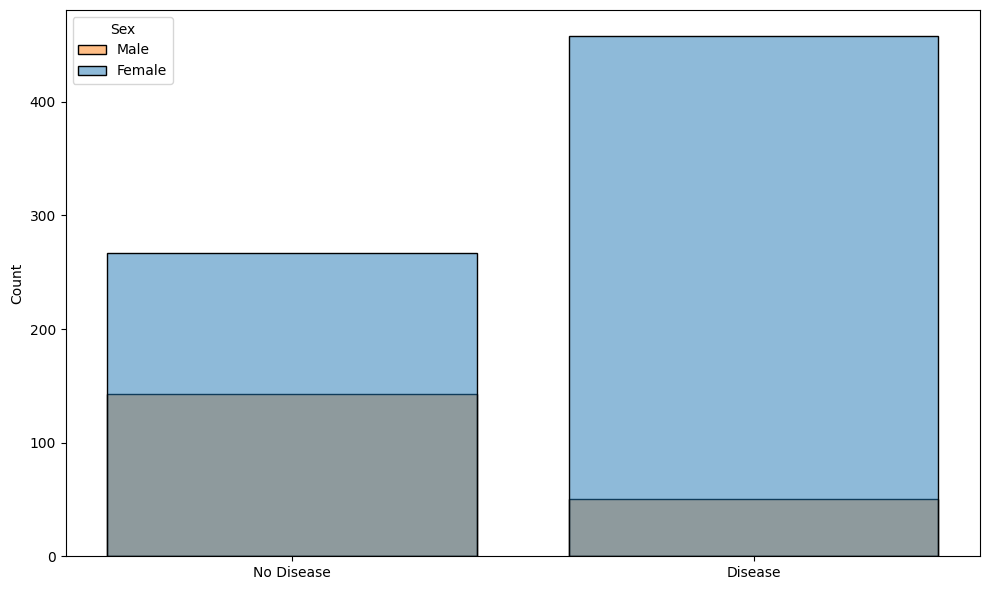

In [10]:
df['HeartDisease_Label'] = df['HeartDisease'].map({0: 'No Disease', 1: 'Disease'})

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="HeartDisease_Label", binwidth=0.1, hue="Sex", shrink=0.8)
plt.xlabel("")
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()
df = df.drop('HeartDisease_Label', axis = 1)

выведем всех людей с сердечными заболиваеями сгруппировав по полу.  
как видим, количество мужчин с сердечными заболеванием больше, чем количество женщин.  

<Axes: xlabel='Age', ylabel='Count'>

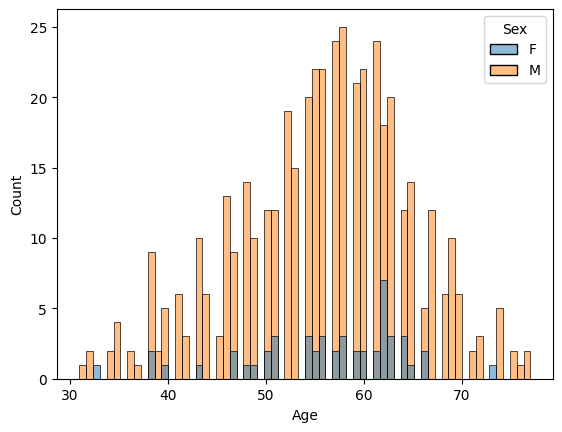

In [11]:
sns.histplot(data = df[df["HeartDisease"] == 1], x = "Age", binwidth = 0.7, hue = "Sex")

добавить график, ораньжевый столбец делить на синий. где ноль - не выводить.  

посмотрим какие типы боли наиболее распространнены у мужчин и женщин.  

<Axes: xlabel='Sex', ylabel='Count'>

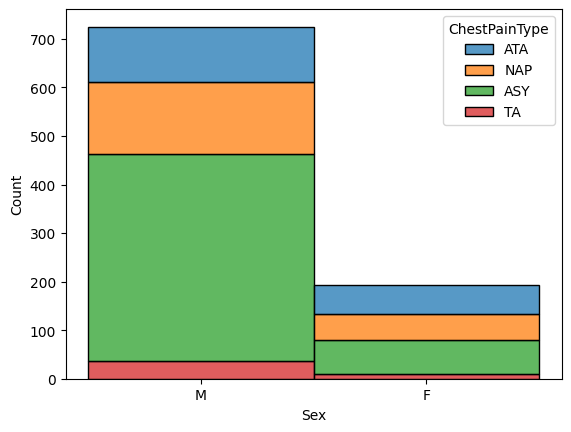

In [12]:
sns.histplot(data = df, x = "Sex", binwidth = 0.2, hue = "ChestPainType", multiple = "stack")

переделать, чтобы наличие заболевания было нормально подписано.  


выведем какой тип боли встречается у больных и здоровых.  

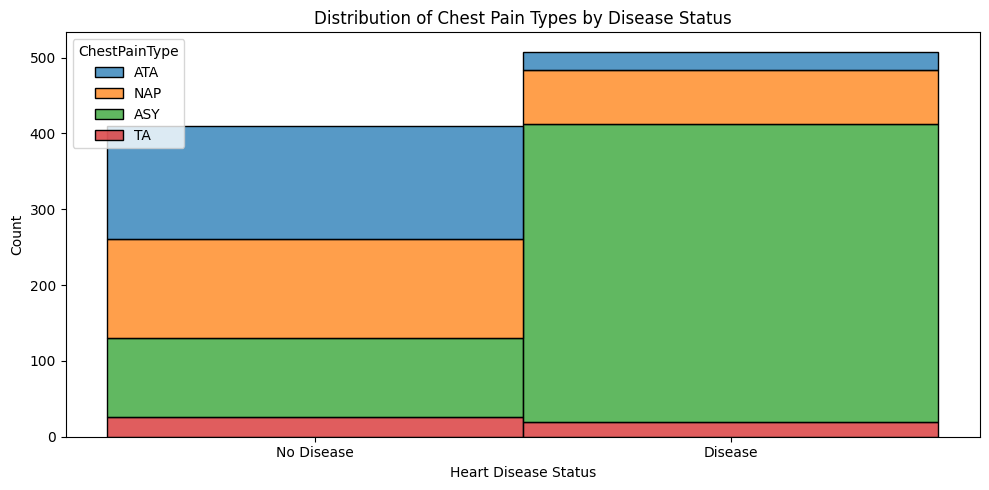

In [13]:
df['HeartDisease_Label'] = df['HeartDisease'].map({0: 'No Disease', 1: 'Disease'})

plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="HeartDisease_Label", binwidth=0.5,
                 hue="ChestPainType", multiple="stack")
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by Disease Status')
plt.tight_layout()
plt.show()

df = df.drop('HeartDisease_Label', axis=1)

выведем матрицу кореляции числовых переменных.  

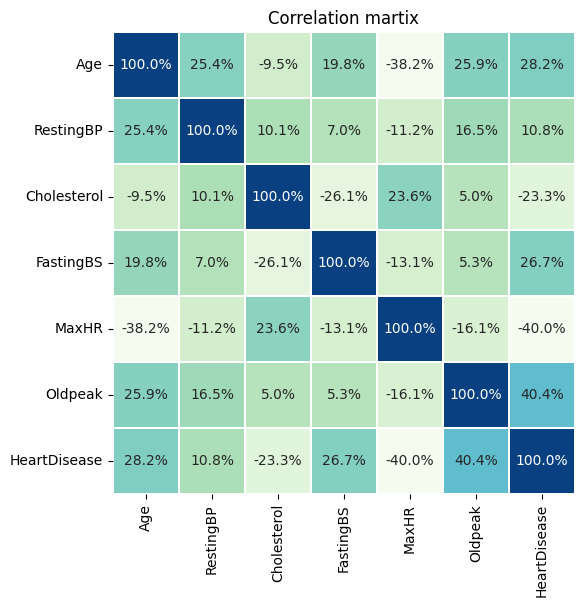

In [14]:
figure_size = (6, 6)
frontsize_annotation = 10
fig, ax = plt.subplots(figsize = figure_size)
plt.title("Correlation martix")
heatmap = sns.heatmap(df.select_dtypes(include = ["int64", "float64"]).corr(),
                   annot=True,
                   square=True,
                   fmt='.1%',
                   cmap='GnBu',
                   cbar=False,
                   annot_kws={'size':str(frontsize_annotation)},
                   linewidth=0.1
                  )

plt.show()

создаём список из имён параметров которые являются типом "object".  

In [15]:
object_col = df.select_dtypes(include = "object").columns.to_list()

разбиваем параметры типа "object" по значениям, которые принимает переменная.   

In [16]:
df_non_tree = pd.get_dummies(df, columns=object_col,drop_first=False)
df_non_tree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


переводим True и False в 1 и 0.  
сохраняем целевую переменную в y.  
в X оставляем остальные переменные.  

In [17]:
y = df_non_tree["HeartDisease"].values
df_non_tree.drop("HeartDisease",axis=1,inplace=True)
df_non_tree=pd.concat([df_non_tree,df["HeartDisease"]],axis=1)
boolean_col = df_non_tree.select_dtypes(include = "boolean").columns.to_list()
df_non_tree[boolean_col] = df_non_tree[boolean_col].astype("int64")
X = df_non_tree.drop("HeartDisease",axis=1)
df_non_tree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


разбаваем дата сет поровну на тренировочный и тестовый набор данных.  


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

импортируем линейную регресию и среднюю кравдратичную ошибку из sklearn

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

обучаем модель на тренировочных данных.  
проводим тестирование на тестовых.  

In [20]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_predicted = model_linear.predict(X_test)

посмотрим на значение ошибок модели.  

In [21]:
print("Score ",model_linear.score(X,y))
print("Mse ", mse(y_predicted,y_test))
print("Rmse ", np.sqrt(mse(y_predicted,y_test)))

Score  0.5634953512500774
Mse  0.1123536564540395
Rmse  0.33519196955482017


выведим список предсказаний модели.  

In [22]:
print(y_predicted)

[ 0.69201943  0.98135265  0.92538024  0.23814867  0.43699634  0.11338059
  0.06472932  0.91850753 -0.07336357  0.95438341  0.95543437  0.05125995
  0.61626241  0.90503333  0.08640983  0.58855675  0.99451499  0.50325958
  0.78363817  0.66722171  1.10715323  0.41133721  0.88839997  0.81030915
  0.71120043  0.26216703  0.08904188  0.90917405  0.64955471  0.77909438
  0.34530462  1.09975567  0.74563494  0.38661029  0.90622333  0.4397974
  0.51545703  0.77347593  0.04670903  0.88650522  0.76492083  0.58619136
  1.06309861  0.22772898  0.39460256  1.1027254   0.97786583  1.00222385
  0.06097105  0.19855153  0.97741269  0.3102227   0.96598951  0.83898936
  0.52874713  0.95760403  0.65950232 -0.04015399  1.10297556  0.97353476
 -0.06188735  0.12438935  0.24561399  0.1342368   1.00728269  0.94699779
  0.13594713 -0.03842931  0.38667515  0.13777055  0.31593612 -0.09721389
  0.66084949  0.95089723  0.65739666  0.07240618  0.66416156  1.03863652
 -0.08641432  0.68907919  0.7054597   0.7016742   0.

округлим предсказанные значения выше 0.5 к 1.  
ниже к 0.  

In [23]:
for i in range(len(y_predicted)):
  if y_predicted[i] >= 0.5:
    y_predicted[i]=int(1)
  else:
    y_predicted[i] = int(0)
y_predicted = y_predicted.astype("int64")
print(y_predicted)

[1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1]


In [24]:
print(y_predicted.astype("int64"))

[1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1]


посчитаем точность предсказания модели.  
в ~80% модель правильно выдаёт ответ.  


In [25]:
acc = 0
for i in range(len(y_predicted)):
  if y_predicted[i] == y_test[i]:
    acc+=1
print(acc/(len(y_predicted)))


0.8714596949891068


выведем коэфиценты модели.  


In [26]:
model_linear.coef_
np.set_printoptions(suppress=True)
for i in range(model_linear.n_features_in_ - 1):
    print(f'{model_linear.feature_names_in_[i]} - { model_linear.coef_[i]}')

Age - 0.0033574809880194687
RestingBP - 0.0005336972492634949
Cholesterol - -0.00044801358845280486
FastingBS - 0.124380240535905
MaxHR - -0.0003657928968208784
Oldpeak - 0.012209332397409586
Sex_F - -0.062172573463622725
Sex_M - 0.062172573463622864
ChestPainType_ASY - 0.22565330036233217
ChestPainType_ATA - -0.03413392702777174
ChestPainType_NAP - -0.06364905915424024
ChestPainType_TA - -0.1278703141803202
RestingECG_LVH - 0.009414785049089554
RestingECG_Normal - 0.002975370665407124
RestingECG_ST - -0.01239015571449675
ExerciseAngina_N - -0.08140092027418375
ExerciseAngina_Y - 0.08140092027418375
ST_Slope_Down - 0.05792963410259439
ST_Slope_Flat - 0.16299011117657133


используем логистискую регресию.  
обучаем её на тренировачных данных.  


In [27]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(tol = 1e-100, max_iter=100000)
model_logistic.fit(X_train, y_train)


LogisticRegression(max_iter=100000, tol=1e-100)

выводим значения ошибок модели

In [28]:
print("Score ",model_logistic.score(X,y))
print("Mse ", mse(y_test, model_logistic.predict(X_test)))

Score  0.8616557734204793
Mse  0.13725490196078433


смотрим точность модели на тестовых данных.  
эта модель так же выдаёт правильный результат в ~80% процентах

In [29]:
model_logistic.predict(X_test)
acc_1 = 0
for i in range(len(model_logistic.predict(X_test))):
  if model_logistic.predict(X_test)[i] == y_test[i]:
    acc_1+=1
print(acc_1/(len(model_logistic.predict(X_test))))

0.8627450980392157


выводим коэфиценты логистической регресии.  

In [30]:
for i in range(model_logistic.n_features_in_ - 1):
    print(f'{model_logistic.feature_names_in_[i]} - {model_logistic.coef_[0][i]}')

Age - 0.027268209393813952
RestingBP - 0.00287927567557954
Cholesterol - -0.004195102424684701
FastingBS - 0.9403043110311752
MaxHR - -0.002011466964693525
Oldpeak - 0.08092451464669656
Sex_F - -0.47749512227520563
Sex_M - 0.4773613294629576
ChestPainType_ASY - 1.4446837386165876
ChestPainType_ATA - -0.12191365200409778
ChestPainType_NAP - -0.5793148047932828
ChestPainType_TA - -0.7435890746294288
RestingECG_LVH - 0.118566664979284
RestingECG_Normal - 0.060397655390251735
RestingECG_ST - -0.17909811318062063
ExerciseAngina_N - -0.5957966062925382
ExerciseAngina_Y - 0.5956628134804339
ST_Slope_Down - 0.28904618632256546
ST_Slope_Flat - 1.0706532454165207
